In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
for col in df.columns:
    print(f'{col} and {df[col].dtype}') 

id and int64
Gender and object
Age and int64
Driving_License and int64
Region_Code and float64
Previously_Insured and int64
Vehicle_Age and object
Vehicle_Damage and object
Annual_Premium and float64
Policy_Sales_Channel and float64
Vintage and int64
Response and int64


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
round(df['Age'].corr(other=df['Annual_Premium'],method='pearson'),2)

np.float64(0.07)

In [9]:
df.drop_duplicates()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
df.groupby('Region_Code')['Annual_Premium'].sum().reset_index()

,Region_Code,Annual_Premium
0,0.0,6.159096e+06
1,1.0,2.732976e+06
2,2.0,1.088451e+08
3,3.0,2.268760e+08
4,4.0,4.249716e+07
5,5.0,3.078443e+07
6,6.0,1.578274e+08
7,7.0,8.350439e+07
8,8.0,1.235426e+09
9,9.0,8.797269e+07


(0.0, 1000.0)

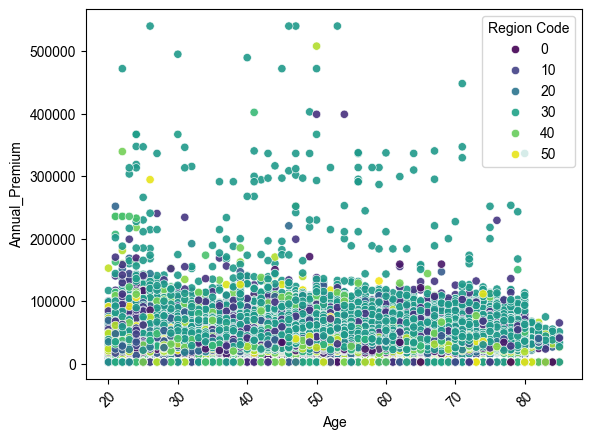

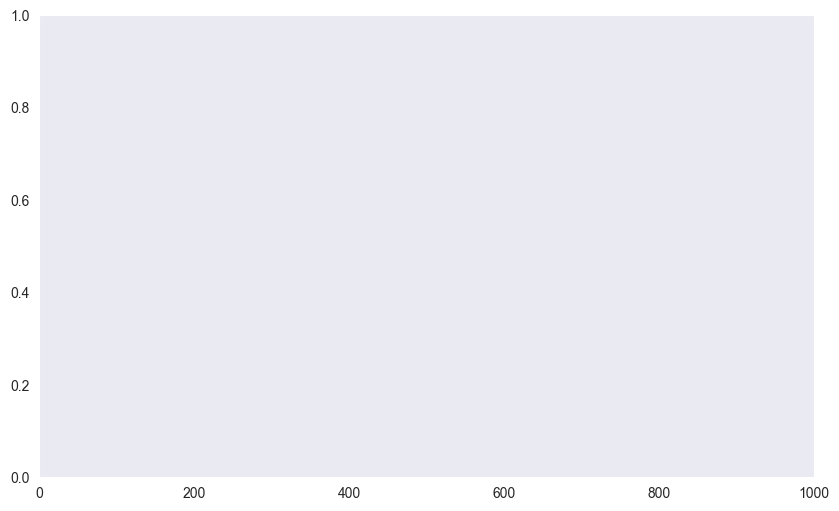

In [11]:
sns.scatterplot(x='Age', y='Annual_Premium', data=df,color='blue', alpha=0.9,legend=True,hue='Region_Code', palette='viridis')

plt.xticks(rotation=45)
plt.legend(title='Region Code', loc='upper right')
sns.set_style('dark')
plt.figure(figsize=(10, 6))
plt.xlim(0, 1000)


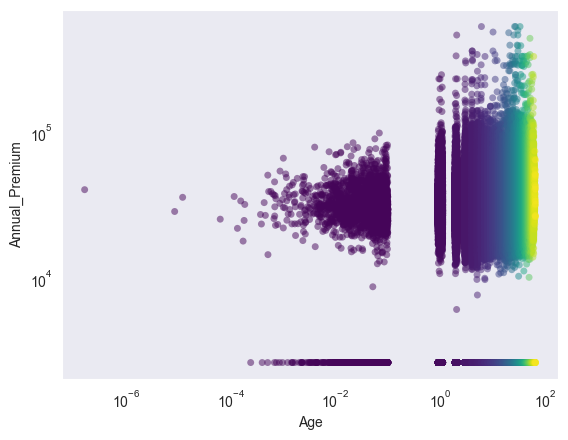

In [12]:
sns.stripplot(x='Age', y='Annual_Premium', data=df, jitter=True, alpha=0.5, palette='viridis')
plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='Annual_Premium', ylabel='Density'>

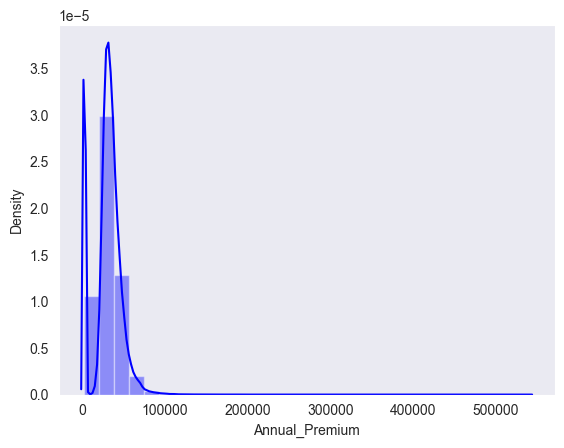

In [13]:
sns.distplot(df['Annual_Premium'], color='blue', bins=30,hist=True,kde=True,)

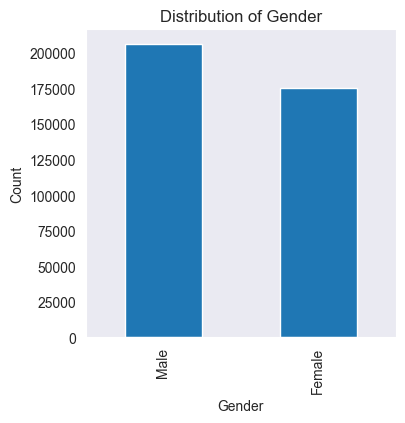

In [14]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

In [20]:
df.groupby('Gender')['Response'].value_counts()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: count, dtype: int64

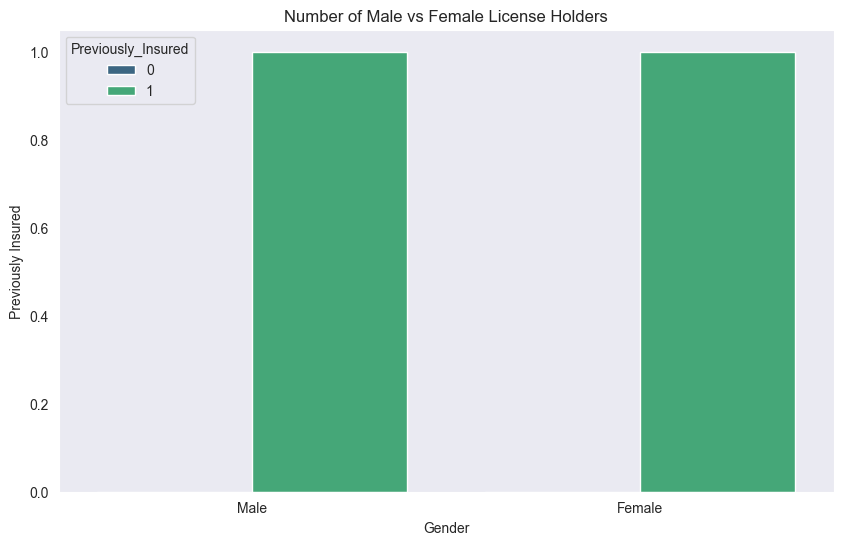

In [34]:

# Filter data where 'Driving_License' is 1
new_data = df[df['Driving_License'] == 1]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=new_data, x='Gender', y='Previously_Insured', palette='viridis', hue='Previously_Insured')
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Previously Insured')
plt.show()
